In [1]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import matplotlib.pyplot as plt

# import some common libraries
import numpy as np
import cv2
import random
import torchvision

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

[[[104  55  46]
  [104  55  46]
  [105  58  46]
  ...
  [ 47  51  33]
  [ 47  51  33]
  [ 47  51  33]]

 [[104  55  46]
  [105  56  47]
  [107  59  47]
  ...
  [ 47  51  33]
  [ 47  51  33]
  [ 47  51  33]]

 [[104  55  46]
  [105  56  47]
  [107  59  47]
  ...
  [ 47  51  33]
  [ 47  51  33]
  [ 47  51  33]]

 ...

 [[ 53  73  33]
  [ 51  70  31]
  [ 54  70  28]
  ...
  [109  74 136]
  [107  72 133]
  [107  72 133]]

 [[ 52  72  32]
  [ 49  69  30]
  [ 52  68  26]
  ...
  [105  74 134]
  [103  72 132]
  [103  72 132]]

 [[ 52  72  32]
  [ 49  69  30]
  [ 52  68  26]
  ...
  [104  73 133]
  [102  70 131]
  [102  70 131]]]
(720, 1280, 3)


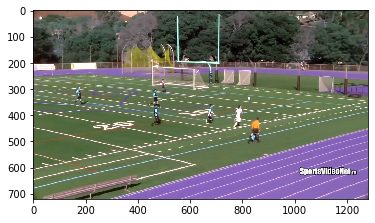

In [2]:
#wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
im = cv2.imread("../img0885.png")
print(im)
#cv2.imshow(im)
plt.imshow(im)
print(im.shape)


In [3]:
!pwd
!ls -l /home/dlinano/detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml

/home/dlinano/PlayerDetection
-rw-r--r-- 1 dlinano dlinano 192 Feb 12 12:20 /home/dlinano/detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml


In [4]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [5]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
outputs["instances"].pred_classes
outputs["instances"].pred_boxes

Boxes(tensor([[ 159.6660,  291.7155,  191.9629,  361.4495],
        [ 824.9491,  407.7380,  871.8081,  504.1727],
        [ 764.0081,  362.9728,  804.2312,  451.3521],
        [ 485.8588,  261.3540,  511.3740,  316.3246],
        [ 663.9565,  358.1792,  694.6057,  426.3832],
        [ 452.6900,  327.0176,  488.5803,  440.3666],
        [ 821.0064,  330.8715,  831.5396,  342.1691],
        [ 726.2622,  296.7159,  733.5050,  303.5596],
        [1032.0865,  192.3204, 1048.9457,  230.9059],
        [ 457.4974,  301.8714,  477.2748,  348.9527],
        [1025.0514,  192.2835, 1041.8541,  231.2681]], device='cuda:0'))

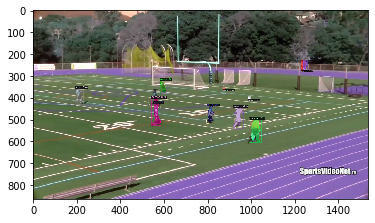

In [6]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#cv2.imshow(v.get_image()[:, :, ::-1])
plt.imshow(v.get_image()[:, :, ::-1])


True

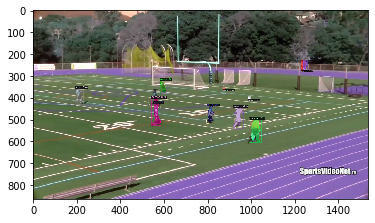

In [7]:
plt.imshow(v.get_image()[:, :, ::-1])
cv2.imwrite('test.jpg',v.get_image()[:, :, ::-1])

In [8]:
cv2.imwrite('test.jpg',v.get_image()[:, :, ::-1])

True

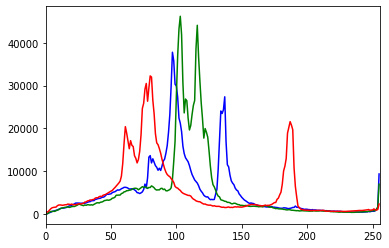

In [9]:



img = cv2.imread('test.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

class:
0
after
ndarray
bool
(720, 1280)
0


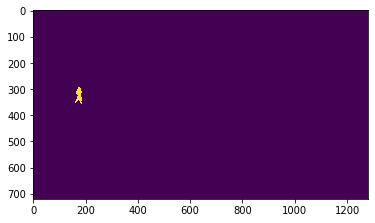

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)


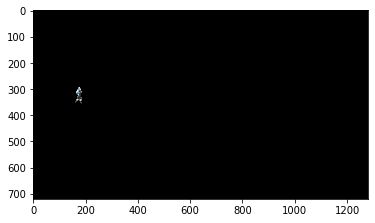

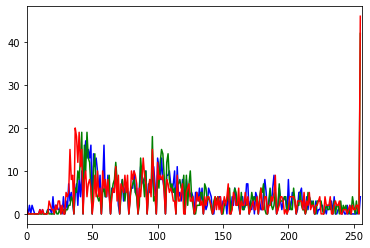

class:
0
after
ndarray
bool
(720, 1280)
0


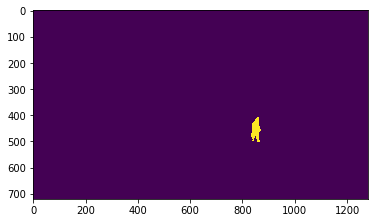

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)


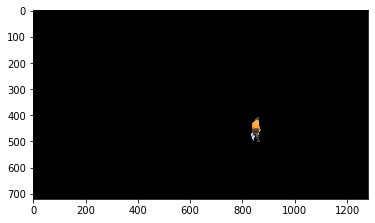

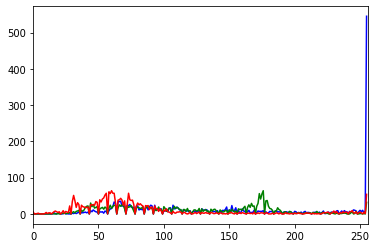

class:
0
after
ndarray
bool
(720, 1280)
0


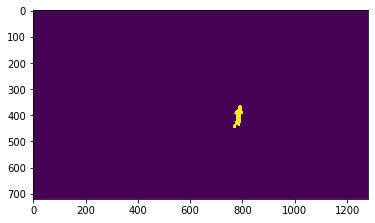

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)


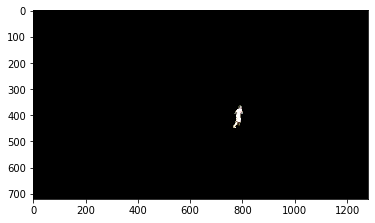

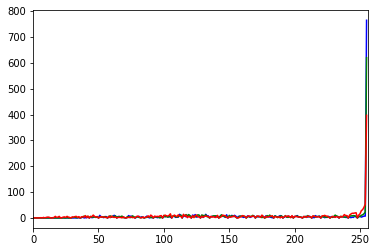

class:
0
after
ndarray
bool
(720, 1280)
0


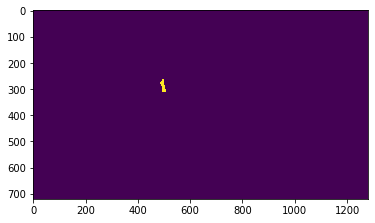

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)


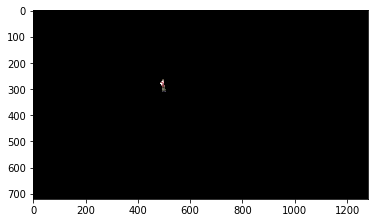

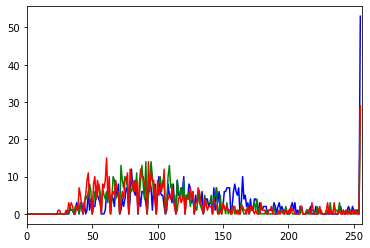

class:
0
after
ndarray
bool
(720, 1280)
0


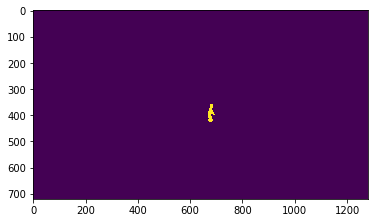

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)


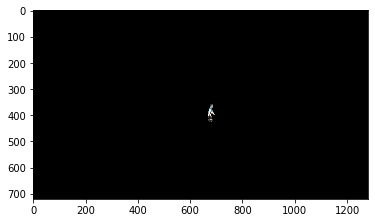

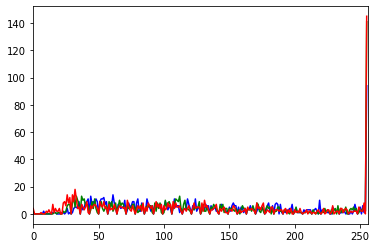

class:
0
after
ndarray
bool
(720, 1280)
0


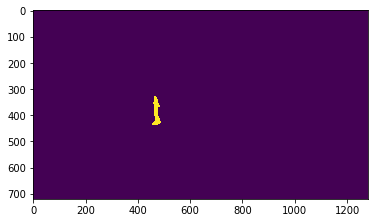

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)


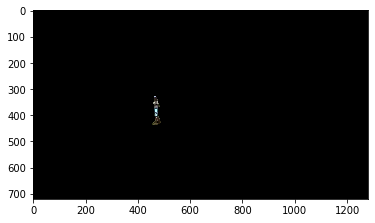

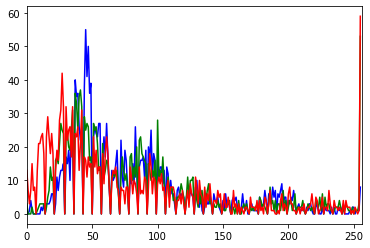

class:
0
after
ndarray
bool
(720, 1280)
0


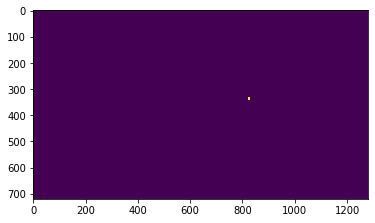

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)


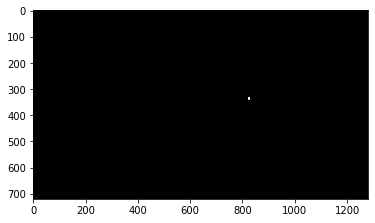

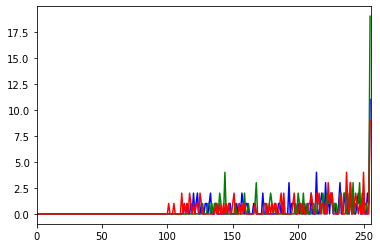

class:
0
after
ndarray
bool
(720, 1280)
0


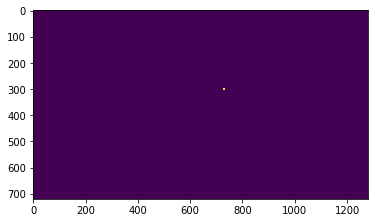

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)


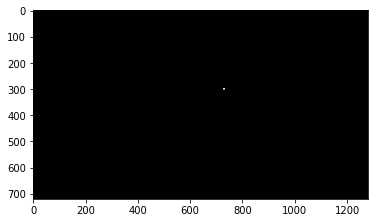

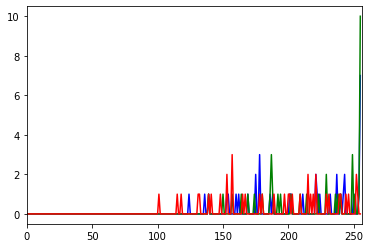

class:
0
after
ndarray
bool
(720, 1280)
0


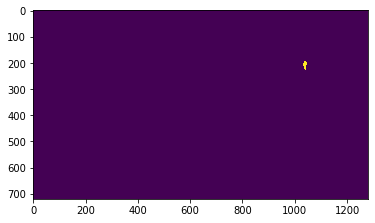

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)


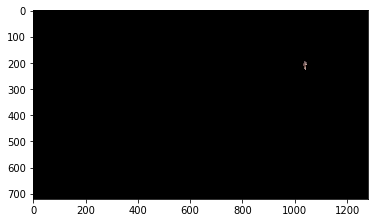

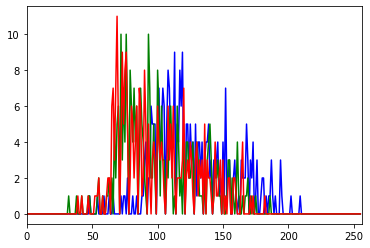

class:
0
after
ndarray
bool
(720, 1280)
0


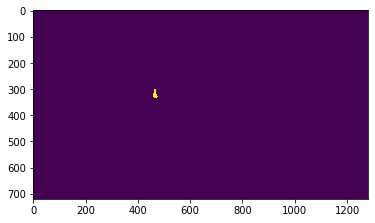

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)


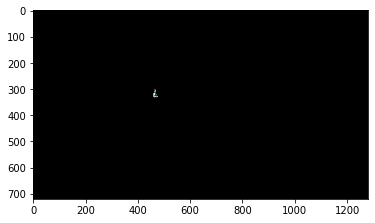

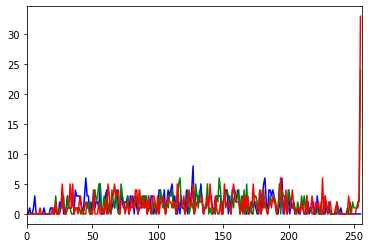

class:
0
after
ndarray
bool
(720, 1280)
0


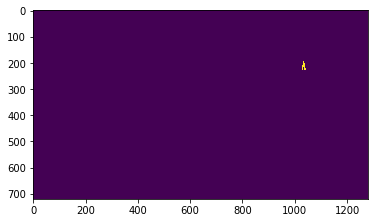

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)


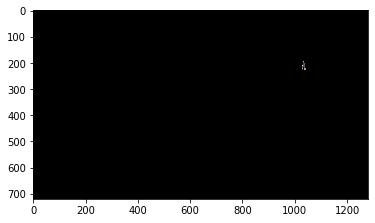

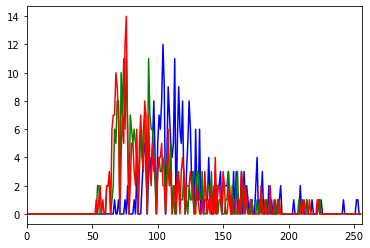

In [10]:
import numpy as np

masks = np.asarray(outputs["instances"].pred_masks.cpu())
classes = outputs["instances"].pred_classes.cpu()
boxes = outputs["instances"].pred_boxes
count = 0
for m in masks:
#if True:
 #m=masks[2]
 print("class:")
 print(classes[2].numpy())
 print("after")
 if isinstance(m, dict):
  print("dict")
 if isinstance(m, list):
  print("list")
 if isinstance(m, np.ndarray):
  print("ndarray")
  print(m.dtype)
  assert m.shape[1] != 2, m.shape
  print(m.shape)
  m=m*1
  _mask = m.astype(np.uint8)
  print(_mask[0][0])
  plt.imshow(_mask)
  plt.show()
  #ret, _mask = cv2.threshold(_mask, 220, 255, cv2.THRESH_BINARY_INV)
  print(_mask.dtype)
  print(_mask)
  print(_mask.shape)
  img = v.get_image()
  print(img.shape)
  #for y in _mask:
        #for x in y:
            #if x != 0:
                #print(x)
  new_img = cv2.bitwise_and(im, im, mask=_mask)
  plt.imshow(new_img)
  plt.show()
  #hist_mask = cv.calcHist([im],[0],_mask,[256],[0,256])
  color = ('b','g','r')
  for i,col in enumerate(color):
    histr = cv2.calcHist([im],[i],_mask,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    #plt.show()
    #plt.imshow(im)
  plt.show()

  cv2.imwrite('new_img' + str(count) + '.jpg',new_img)
  count += 1
  #res = cv2.bitwise_and(img, img, mask=_mask)

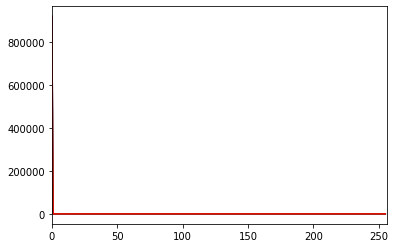

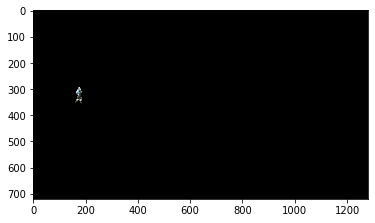

In [11]:
img = cv2.imread('new_img0.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()
plt.imshow(img)


(720, 1280)
(720, 1280)


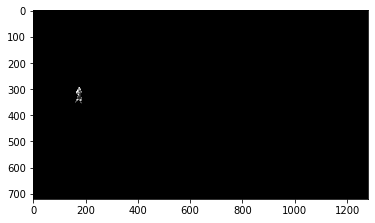

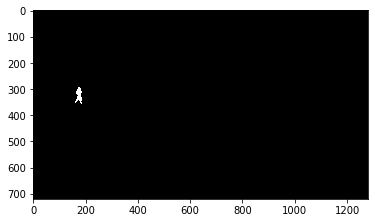

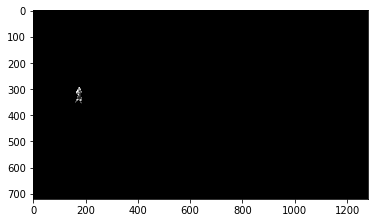

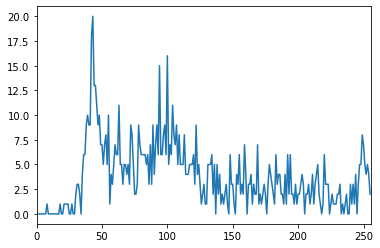

(720, 1280)
(720, 1280)


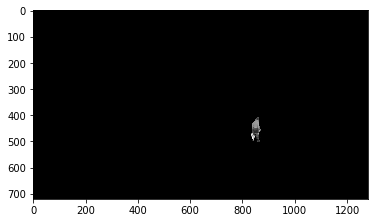

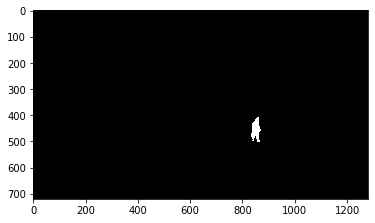

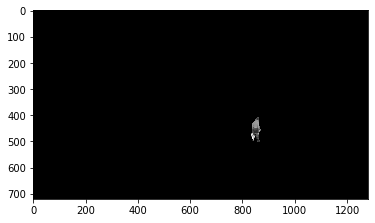

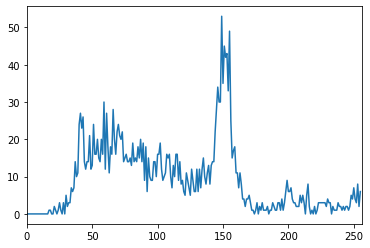

(720, 1280)
(720, 1280)


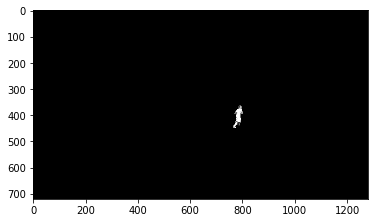

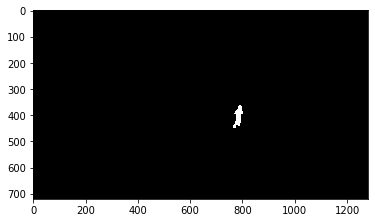

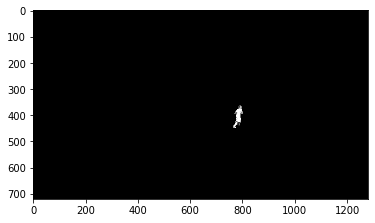

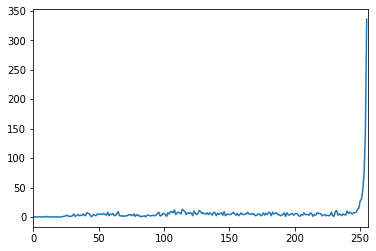

(720, 1280)
(720, 1280)


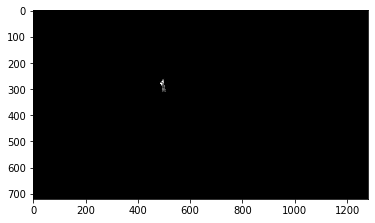

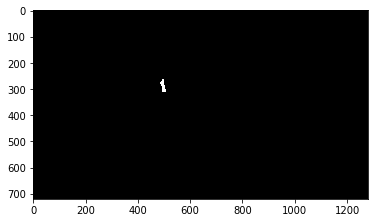

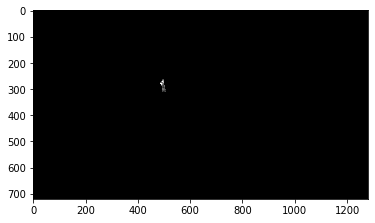

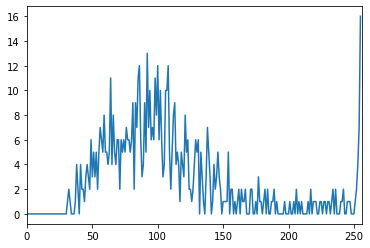

(720, 1280)
(720, 1280)


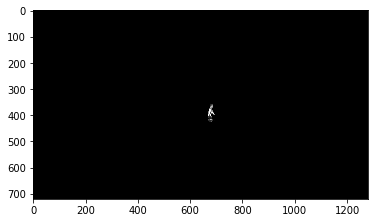

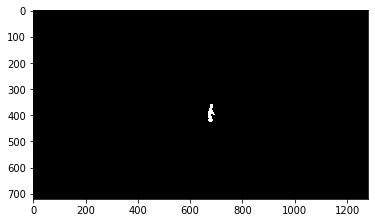

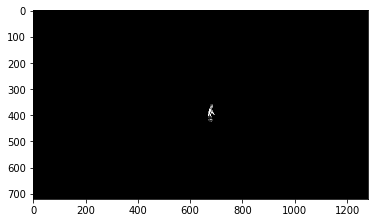

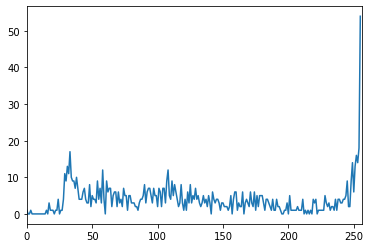

(720, 1280)
(720, 1280)


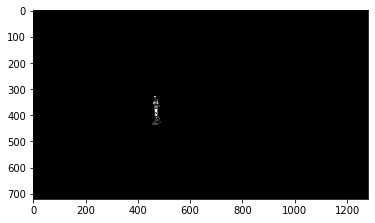

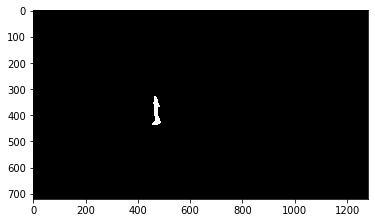

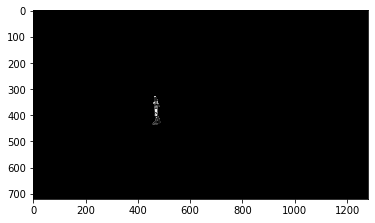

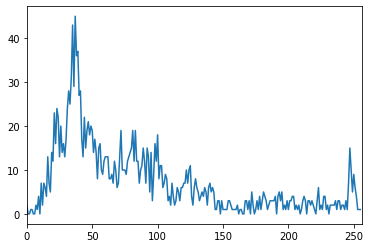

(720, 1280)
(720, 1280)


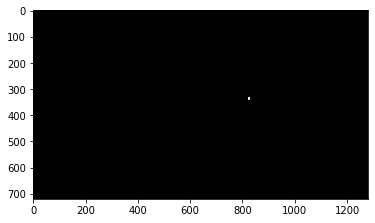

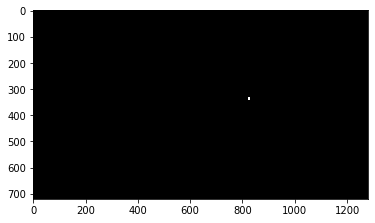

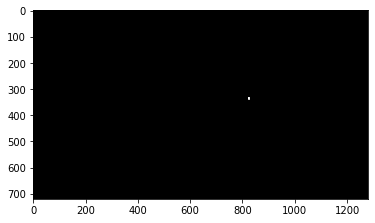

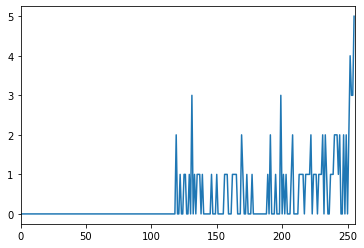

(720, 1280)
(720, 1280)


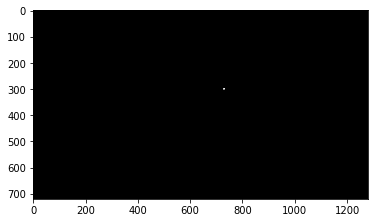

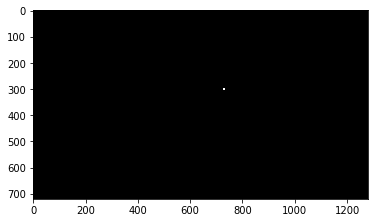

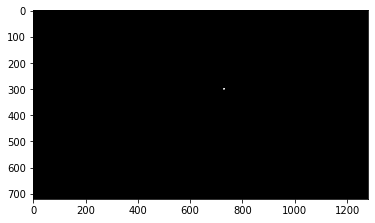

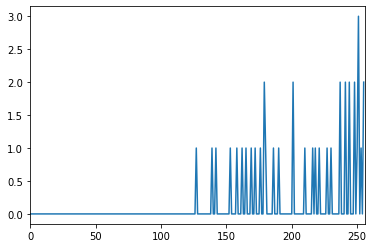

(720, 1280)
(720, 1280)


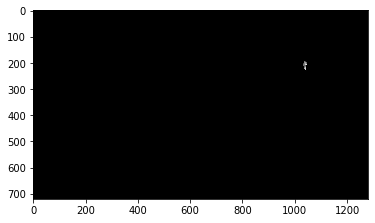

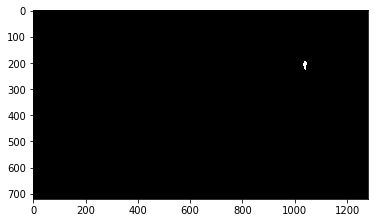

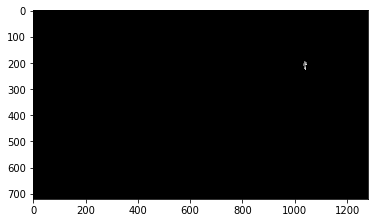

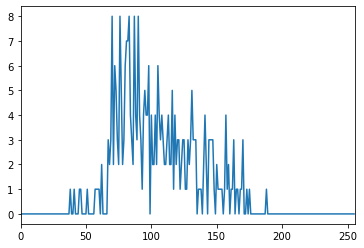

In [12]:
import cv2 as cv
for i in range(9):
    img = cv.imread('new_img'+ str(i) + '.jpg',0)
    # create a mask
    mask = masks[i]
    mask=mask*1
    print(mask.shape)
    print(img.shape)
    _mask = mask.astype(np.uint8)
    #mask[100:300, 100:400] = 255
    masked_img = cv.bitwise_and(img,img,mask = _mask)
    # Calculate histogram with mask and without mask
    # Check third argument for mask
    hist_full = cv.calcHist([img],[0],None,[256],[0,256])
    hist_mask = cv.calcHist([img],[0],_mask,[256],[0,256])
    plt.imshow(img, 'gray')
    plt.show()
    plt.imshow(_mask,'gray')
    plt.show()
    plt.imshow(masked_img, 'gray')
    plt.show()
    plt.plot(hist_mask)
    plt.xlim([0,256])
    plt.show()

In [13]:
#Color space change
#histogram for each color space 

(720, 1280)
(720, 1280)
(720, 1280, 3)
(720, 1280, 3)


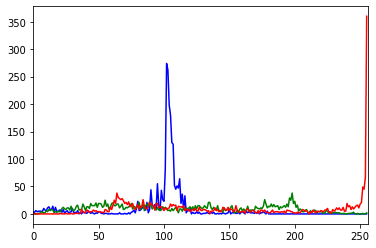

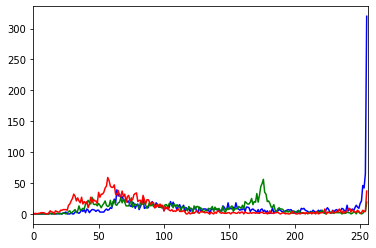

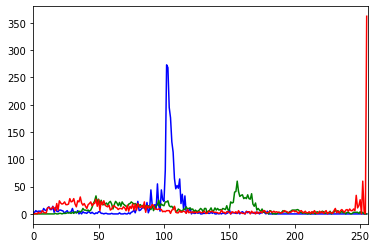

(720, 1280)
(720, 1280)
(720, 1280, 3)
(720, 1280, 3)


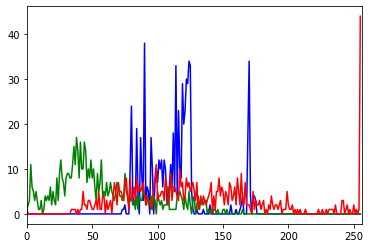

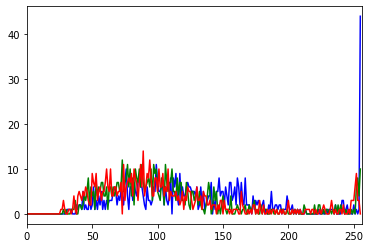

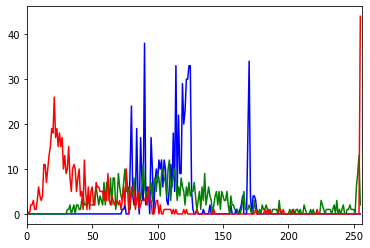

In [14]:
for j in range(1,4,2):
    mask = masks[j]
    mask = mask*1
    print(mask.shape)
    print(img.shape)
    _mask = mask.astype(np.uint8)
    bgr = cv2.imread('new_img' + str(j) + '.jpg')
    print(bgr.shape)
    hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
    hsl = cv2.cvtColor(bgr, cv2.COLOR_BGR2HLS)
    print(hsv.shape)
    #hist_mask = cv.calcHist([hsv],[0],_mask,[256],[0,256])
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([hsv],[i],_mask,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        #plt.show()
        #plt.imshow(im)
    plt.show()
    for i,col in enumerate(color):
        histr = cv2.calcHist([bgr],[i],_mask,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        #plt.show()
        #plt.imshow(im)
    plt.show()
    for i,col in enumerate(color):
        histr = cv2.calcHist([hsl],[i],_mask,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        #plt.show()
        #plt.imshow(im)
    plt.show()

(720, 1280)
(720, 1280)
(720, 1280, 3)
(720, 1280, 3)


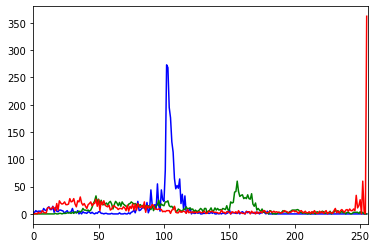

(720, 1280)
(720, 1280)
(720, 1280, 3)
(720, 1280, 3)


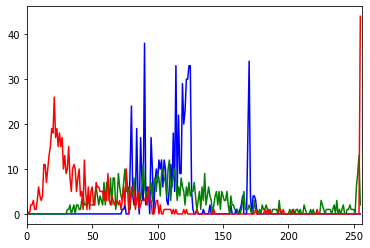

In [15]:
for j in range(1,4,2):
    mask = masks[j]
    mask = mask*1
    print(mask.shape)
    print(img.shape)
    _mask = mask.astype(np.uint8)
    bgr = cv2.imread('new_img' + str(j) + '.jpg')
    print(bgr.shape)
    hsl = cv2.cvtColor(bgr, cv2.COLOR_BGR2HLS)
    print(hsl.shape)
    #hist_mask = cv.calcHist([hsv],[0],_mask,[256],[0,256])
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([hsl],[i],_mask,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        #plt.show()
        #plt.imshow(im)
    plt.show()